## Simple Linear Regression

Lets build a simple linear regression model using Theano

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from theano import *
import seaborn as sns
import theano.tensor as T
rng = numpy.random

%matplotlib inline

class SimpleLinearRegression:
    def __init__(self, alpha=0.01, training_steps=1000):
        self.alpha = alpha
        self.training_steps = training_steps
    
    def build(self):
        X = T.vector()
        y = T.vector()

        w = theano.shared(rng.randn(), name ='w')
        c = theano.shared(rng.randn(), name ='c')
        
        #prediction is the dot product between the observation and the weight plus the error term
        prediction = T.dot(X, w) + c
        
        #calculate the MSE(Mean Squared Error)
        cost = T.mean(T.sqr(y - prediction))

        gradient_w, gradient_c = T.grad(cost, [w, c])
        updates = [[w, w - gradient_w * 0.01], [c, c - gradient_c * 0.01]]
        
        self.model = theano.function([X], prediction)
        return theano.function(
            inputs=[X, y], 
            outputs=cost,
            updates=updates)
    
    def fit(self, X, y):
        train = self.build()
        for i in range(self.training_steps):
            current_e = train(X,y)
    
    def predict(self, observations):
        return self.model(observations)

### Sample Observations
We need to geneate sample observations in linear space, lets make a simple function

In [12]:
train_X = np.linspace(-1, 1, 101)
train_y = train_X * 1.5

In [44]:
sr = SimpleLinearRegression()
sr.fit(train_X, train_y)

In [45]:
y_hat = sr.predict(train_X)
(train_y - y_hat).mean()

-3.0575843377908173e-09

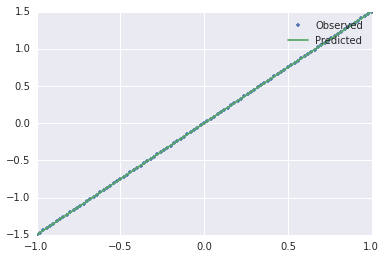

In [46]:
plt.plot(train_X, train_y, '.', label='Observed')
plt.plot(train_X, y_hat, label='Predicted')
plt.legend()
plt.show();

### Scikit Learn
For a basic comparison how does our simple regressor compare to the one in sklearn

In [47]:
from sklearn.linear_model import LinearRegression

X = train_X[:,np.newaxis]
lr = LinearRegression()
lr.fit(X, train_y)

y_hat = lr.predict(X)
(train_y - y_hat).mean()

-2.2317920692794449e-18

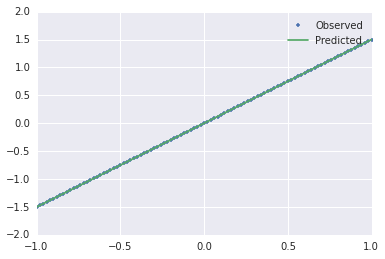

In [48]:
plt.plot(train_X, train_y, '.', label='Observed')
plt.plot(train_X, y_hat, label='Predicted')
plt.legend()
plt.show();